# Overall Specificity

In [1]:
import pandas as pd,seaborn as sns
from katlas.core import *
from katlas.plot import *
from matplotlib import pyplot as plt

## Load raw data

In [2]:
pspa_ST = pd.read_csv('raw/pspa_raw.csv').set_index('kinase')

pspa_tyr = pd.read_csv('raw/pspa_tyr_raw.csv').set_index('kinase')

## Map pspa tyr kinase

Transform protein name to gene name

In [3]:
pspa_info = pd.read_csv('raw/lew_tyr_info.csv')

In [4]:
pspa_info

,lew_kinase,lew_kinase2,kinase,tyr,kinase_tyr
0,ABL,ABL,ABL1,NaN,ABL1
1,ACK,ACK,TNK2,NaN,TNK2
2,ALK,ALK,ALK,NaN,ALK
3,ARG,ARG,ABL2,NaN,ABL2
4,AXL,AXL,AXL,NaN,AXL
...,...,...,...,...,...
88,VEGFR2,VEGFR2,KDR,NaN,KDR
89,VEGFR3,VEGFR3,FLT4,NaN,FLT4
90,WEE1_TYR,WEE1,WEE1,TYR,WEE1_TYR
91,YES,YES,YES1,NaN,YES1


In [5]:
kinase_map = pspa_info.set_index('lew_kinase').kinase_tyr

In [6]:
# map kinase name
pspa_tyr.index = pspa_tyr.index.map(kinase_map)

In [7]:
pspa_tyr.index

Index(['ABL1', 'TNK2', 'ALK', 'ABL2', 'AXL', 'BLK', 'BMPR2_TYR', 'PTK6', 'BTK',
       'CSF1R', 'CSK', 'MATK', 'DDR1', 'DDR2', 'EGFR', 'EPHA1', 'EPHA2',
       'EPHA3', 'EPHA4', 'EPHA5', 'EPHA6', 'EPHA7', 'EPHA8', 'EPHB1', 'EPHB2',
       'EPHB3', 'EPHB4', 'BMX', 'PTK2', 'FER', 'FES', 'FGFR1', 'FGFR2',
       'FGFR3', 'FGFR4', 'FGR', 'FLT3', 'FRK', 'FYN', 'HCK', 'ERBB2', 'ERBB4',
       'IGF1R', 'INSR', 'INSRR', 'ITK', 'JAK1', 'JAK2', 'JAK3', 'KIT', 'LCK',
       'LIMK1_TYR', 'LIMK2_TYR', 'LTK', 'LYN', 'MERTK', 'MET', 'MAP2K4_TYR',
       'MAP2K6_TYR', 'MAP2K7_TYR', 'MST1R', 'MUSK', 'PKMYT1_TYR', 'NEK10_TYR',
       'PDGFRA', 'PDGFRB', 'PDHK1_TYR', 'PDHK3_TYR', 'PDHK4_TYR', 'PINK1_TYR',
       'PTK2B', 'RET', 'ROS1', 'SRC', 'SRMS', 'SYK', 'TEC', 'TESK1_TYR', 'TEK',
       'TNK1', 'TNNI3K_TYR', 'NTRK1', 'NTRK2', 'NTRK3', 'TXK', 'TYK2', 'TYRO3',
       'FLT1', 'KDR', 'FLT4', 'WEE1_TYR', 'YES1', 'ZAP70'],
      dtype='object', name='kinase')

## Combine

In [8]:
pspa_combine = pd.concat([pspa_ST,pspa_tyr]).iloc[:,:-23] # cut the 5 position of tyr as st do not have 

In [9]:
pspa_combine

,-5P,-5G,-5A,-5C,-5S,-5T,-5V,-5I,-5L,-5M,-5F,-5Y,-5W,-5H,-5K,-5R,-5Q,-5N,-5D,-5E,-5s,-5t,-5y,-4P,-4G,-4A,-4C,-4S,-4T,-4V,-4I,-4L,-4M,-4F,-4Y,-4W,-4H,-4K,-4R,-4Q,-4N,-4D,-4E,-4s,-4t,-4y,-3P,-3G,-3A,-3C,-3S,-3T,-3V,-3I,-3L,-3M,-3F,-3Y,-3W,-3H,-3K,-3R,-3Q,-3N,-3D,-3E,-3s,-3t,-3y,-2P,-2G,-2A,-2C,-2S,-2T,-2V,-2I,-2L,-2M,-2F,-2Y,-2W,-2H,-2K,-2R,-2Q,-2N,-2D,-2E,-2s,-2t,-2y,-1P,-1G,-1A,-1C,-1S,-1T,-1V,-1I,-1L,-1M,-1F,-1Y,-1W,-1H,-1K,-1R,-1Q,-1N,-1D,-1E,-1s,-1t,-1y,1P,1G,1A,1C,1S,1T,1V,1I,1L,1M,1F,1Y,1W,1H,1K,1R,1Q,1N,1D,1E,1s,1t,1y,2P,2G,2A,2C,2S,2T,2V,2I,2L,2M,2F,2Y,2W,2H,2K,2R,2Q,2N,2D,2E,2s,2t,2y,3P,3G,3A,3C,3S,3T,3V,3I,3L,3M,3F,3Y,3W,3H,3K,3R,3Q,3N,3D,3E,3s,3t,3y,4P,4G,4A,4C,4S,4T,4V,4I,4L,4M,4F,4Y,4W,4H,4K,4R,4Q,4N,4D,4E,4s,4t,4y
kinase,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AAK1,7.614134e+06,2.590563e+06,3.001315e+06,4.696631e+06,4.944312e+06,8.315838e+06,1.005654e+07,1.643306e+07,1.049974e+07,9.133578e+06,4.493054e+06,1.006273e+07,3.327455e+06,3.504743e+06,2.767294e+06,1.010574e+07,5.923673e+06,2.909153e+06,1.695156e+06,1.617849e+06,2.128670e+06,2.128670e+06,6.460995e+06,5.260313e+06,6.325834e+06,6.957994e+06,5.369435e+06,5.713921e+06,6.612202e+06,6.093662e+06,6.120309e+06,7.306988e+06,6.829678e+06,5.119222e+06,5.263236e+06,3.974771e+06,5.065008e+06,7.968511e+06,7.041049e+06,6.174444e+06,4.228327e+06,3.271231e+06,5.511934e+06,3.267818e+06,3.267818e+06,3.338570e+06,8.921287e+06,4.210323e+06,9.202468e+06,5.247518e+06,6.741480e+06,6.810878e+06,5271476.43,4928031.78,4.337562e+06,6.432257e+06,4.006022e+06,3.383022e+06,3.493591e+06,3.269350e+06,4.253144e+06,4.777087e+06,5.719014e+06,4.787112e+06,2.233865e+06,3.045337e+06,2.489664e+06,2.489664e+06,2.253600e+06,2.216029e+06,2.766177e+06,5.269960e+06,5.606488e+06,5.715777e+06,8.442377e+06,3330815.96,3699660.08,5.573758e+06,1.141874e+07,3289921.82,3.904724e+06,2.831768e+06,5.548345e+06,5.749699e+06,5.431821e+06,1.485362e+07,7.911792e+06,7.877661e+06,6.228872e+06,2.050311e+06,2.050311e+06,4.757609e+06,1.274357e+07,7922825.91,4.320089e+06,3.424102e+06,2951131.47,3.531424e+06,4.395649e+06,4.876362e+06,7.337788e+06,6213208.09,6.110447e+06,8.716737e+06,4935259.96,7.723412e+06,1.379149e+07,1.035962e+07,4.456719e+06,4.865705e+06,1.811253e+06,1.639403e+06,1.357999e+06,1.357999e+06,2.002371e+06,6415286.88,99964895.25,4.316875e+06,3.007075e+06,2745785.51,8.910120e+06,1.483692e+06,1.412341e+06,1.811600e+06,1.711245e+06,1.783236e+06,1.979521e+06,2.246919e+06,2.217612e+06,2.688448e+06,3.450818e+06,1.911930e+06,2358432.64,1421652.45,1.359588e+06,1.706013e+06,1.706013e+06,1.389642e+06,5119157.71,7278540.04,7.284322e+06,6.474715e+06,8.229141e+06,3.132517e+07,5.271194e+06,3.595811e+06,4.019474e+06,4.672000e+06,4.719446e+06,4.458959e+06,5.560394e+06,6.019748e+06,5.603859e+06,7.520621e+06,7.492737e+06,8.100332e+06,5364638.21,5087031.12,3.976345e+06,3.976345e+06,3.984759e+06,7.873215e+06,10666925.10,6726092.35,8.347111e+06,8474126.59,36243425.13,7.049439e+06,4.480458e+06,5.646461e+06,5.049205e+06,4.966940e+06,6.154423e+06,5.554385e+06,7784625.71,8536454.84,10411516.21,7199439.88,8496115.61,4678462.79,4293019.55,3871242.35,3871242.35,4144314.24,6.754641e+06,7.548893e+06,6.945442e+06,6.316584e+06,5.852228e+06,1.198637e+07,4.544765e+06,4.468426e+06,4.958371e+06,4.992757e+06,5.630292e+06,5.605199e+06,8.889243e+06,6.020663e+06,8.938081e+06,9.983402e+06,6.833482e+06,6.364453e+06,4.189046e+06,4921595.57,2705053.53,2705053.53,2909279.71
ACVR2A,4.991039e+06,5.783856e+06,7.015771e+06,8.367603e+06,7.072052e+06,7.601400e+06,7.188292e+06,7.513916e+06,7.159895e+06,6.266123e+06,7.217726e+06,6.944710e+06,9.655464e+06,6.855045e+06,6.135260e+06,5.714942e+06,5.174360e+06,6.446238e+06,1.067680e+07,9.490371e+06,9.417512e+06,9.417512e+06,9.143263e+06,5.189501e+06,6.115977e+06,6.183207e+06,8.746775e+06,8.620216e+06,8.958569e+06,6.057960e+06,5.865980e+06,5.795429e+0

## Scale each position to 1

In [10]:
data= []
for kinase in pspa_combine.index:
    m = get_one_kinase(pspa_combine,kinase).T # It will drop s as it is a duplicate of t
    norm = m/m.sum()
    data.append(norm.unstack().values)
    
# Get column name
col = norm.unstack().reset_index()
col['Position'] = col['position'].astype(str) + col['aa']

# Get the stacked normalize data
norm = pd.DataFrame(data,columns=col['Position'].tolist(),index=pspa_combine.index)

## Check

Make sure it is one for each kinase

In [11]:
m = get_one_kinase(norm,kinase,drop_s=False).T

In [12]:
m.sum()

position
-5    1.0
-4    1.0
-3    1.0
-2    1.0
-1    1.0
 1    1.0
 2    1.0
 3    1.0
 4    1.0
dtype: float64

## Get specificity score

In [13]:
speci = pd.DataFrame(norm.max(1),columns=['speci']).reset_index()

In [14]:
info=Data.get_kinase_info().query('pseudo=="0"')

In [15]:
info = info[['kinase','group']]

In [16]:
speci = speci.merge(info,how='left')

In [17]:
speci

,kinase,speci,group
0,AAK1,0.639600,Other
1,ACVR2A,0.228739,TKL
2,ACVR2B,0.221615,TKL
3,AKT1,0.466208,AGC
4,AKT2,0.520962,AGC
...,...,...,...
391,KDR,0.124571,TK
392,FLT4,0.145792,TK
393,WEE1_TYR,0.239644,NaN
394,YES1,0.141651,TK


In [18]:
# unmapped are dual specific kinase with tyr tested 
speci[speci.group.isna()]

,kinase,speci,group
309,BMPR2_TYR,0.134159,NaN
354,LIMK1_TYR,0.111245,NaN
355,LIMK2_TYR,0.094722,NaN
360,MAP2K4_TYR,0.090374,NaN
361,MAP2K6_TYR,0.078441,NaN
362,MAP2K7_TYR,0.096297,NaN
365,PKMYT1_TYR,0.091303,NaN
366,NEK10_TYR,0.154401,NaN
369,PDHK1_TYR,0.082651,NaN
370,PDHK3_TYR,0.079051,NaN


In [19]:
speci.group = speci.group.fillna('Dual')

## Plot

In [20]:
sort_pspa = speci.sort_values('speci',ascending=False)
sort_pspa

,kinase,speci,group
69,CK1G3,0.819808,CK1
63,CK1A,0.791040,CK1
299,YANK3,0.756693,AGC
110,GSK3B,0.744287,CMGC
298,YANK2,0.739325,AGC
...,...,...,...
369,PDHK1_TYR,0.082651,Dual
380,TESK1_TYR,0.079315,Dual
370,PDHK3_TYR,0.079051,Dual
361,MAP2K6_TYR,0.078441,Dual


In [21]:
from fastcore.xtras import load_pickle

In [22]:
kinase_color = load_pickle('raw/kinase_color.pkl')

In [23]:
kinase_color

{'TK': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 'AGC': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 'CMGC': (1.0, 0.4980392156862745, 0.054901960784313725),
 'Other': (1.0, 0.7333333333333333, 0.47058823529411764),
 'TKL': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 'STE': (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 'CK1': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 'CAMK': (1.0, 0.596078431372549, 0.5882352941176471),
 'Atypical': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 'RGC': (0.7725490196078432, 0.6901960784313725, 0.8352941176470589)}

In [24]:
kinase_color['Dual'] =(0.5, 0.5, 0.5) # add gray

In [25]:
sns.set(rc={"figure.dpi":200, 'savefig.dpi':200})
sns.set_context('notebook')
sns.set_style("ticks")

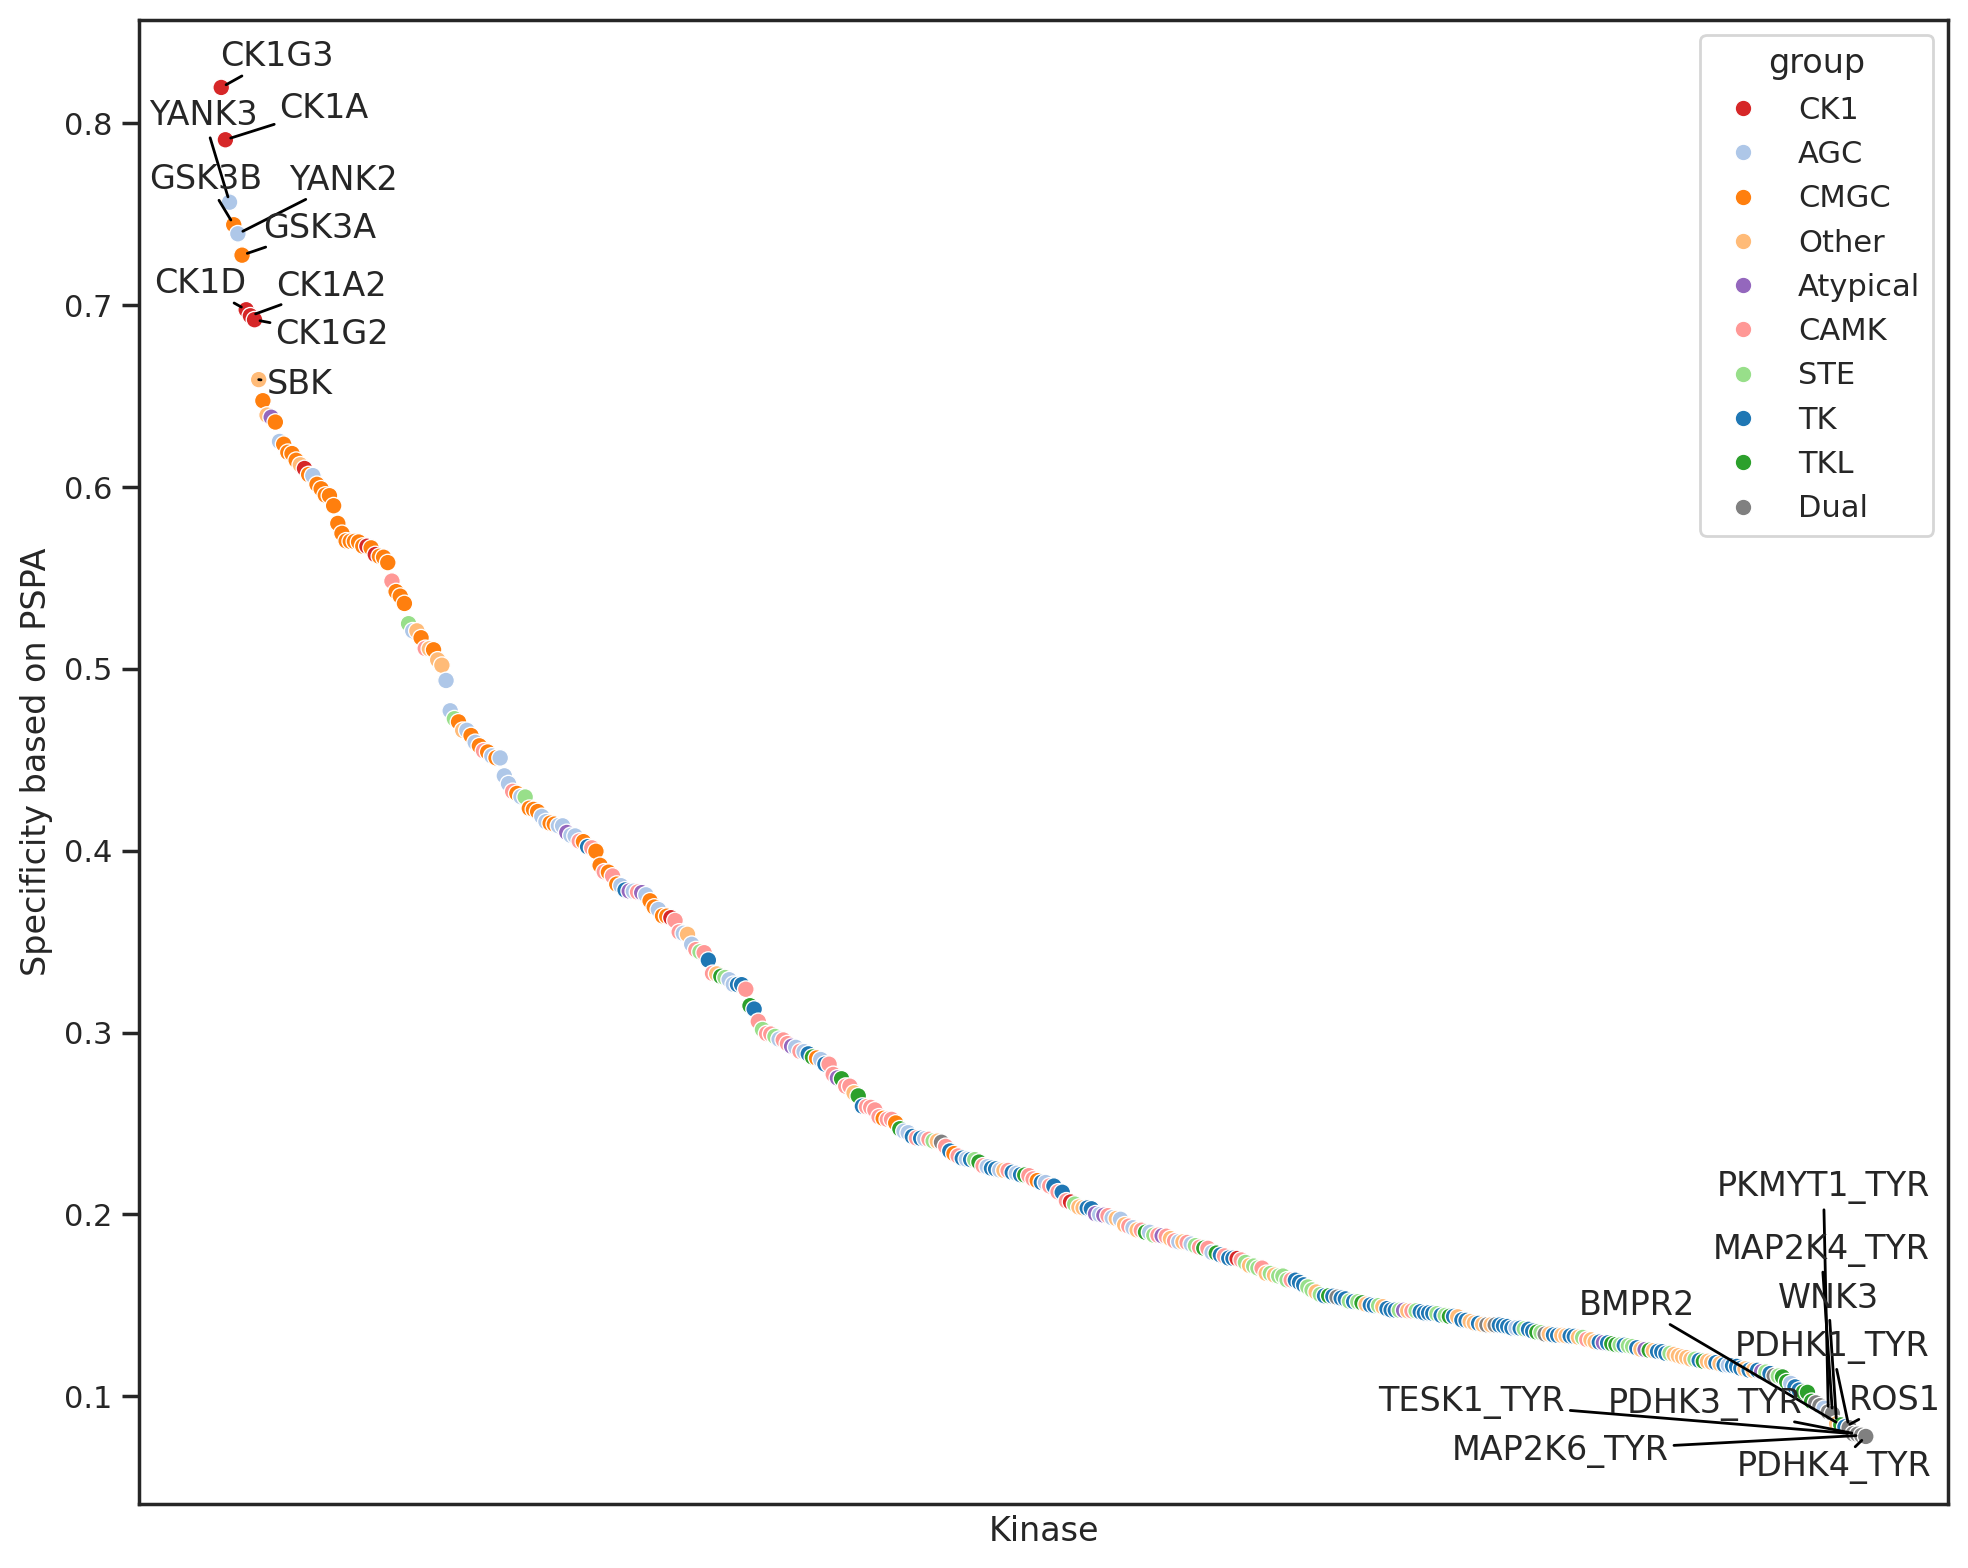

In [26]:
plot_rank(sort_pspa,x='kinase',y='speci',hue='group',palette=kinase_color)
plt.ylabel('Specificity based on PSPA')
plt.xlabel('Kinase'); 

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/katlas/plot.py:406: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=group, y=value, order=idx, **kwargs)


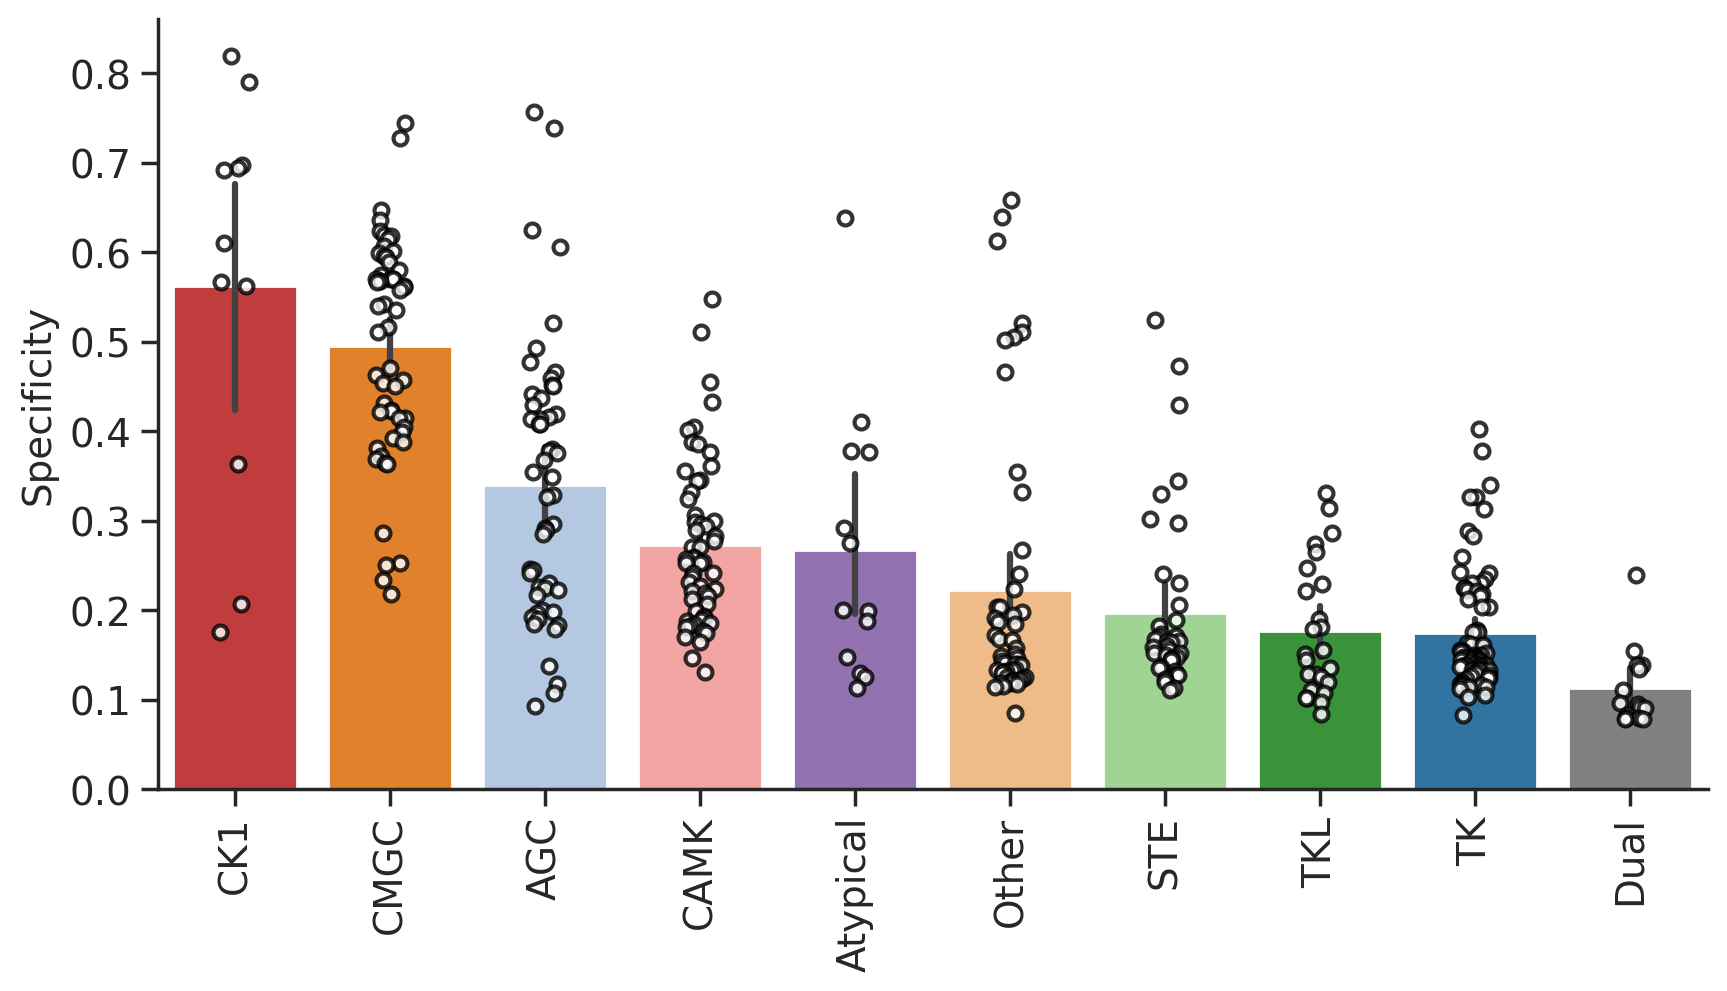

In [27]:
plot_bar(sort_pspa,'speci','group',palette=kinase_color,figsize=(10,5))
plt.ylabel('Specificity');

## plot for CDDM

In [28]:
ks = Data.get_cddm().iloc[:,:-6]

In [29]:
# ks = pd.read_excel('raw/freq_main.xlsx',index_col = 0)

ks = ks.max(1).reset_index(name='speci')

ks = ks.rename(columns={'index':'kinase'})

sort_ks = ks.sort_values('speci',ascending=False).reset_index(drop=True)

# sort_ks.to_csv('raw/specificity_ks.csv',index=False)

sort_ks =sort_ks.merge(info)

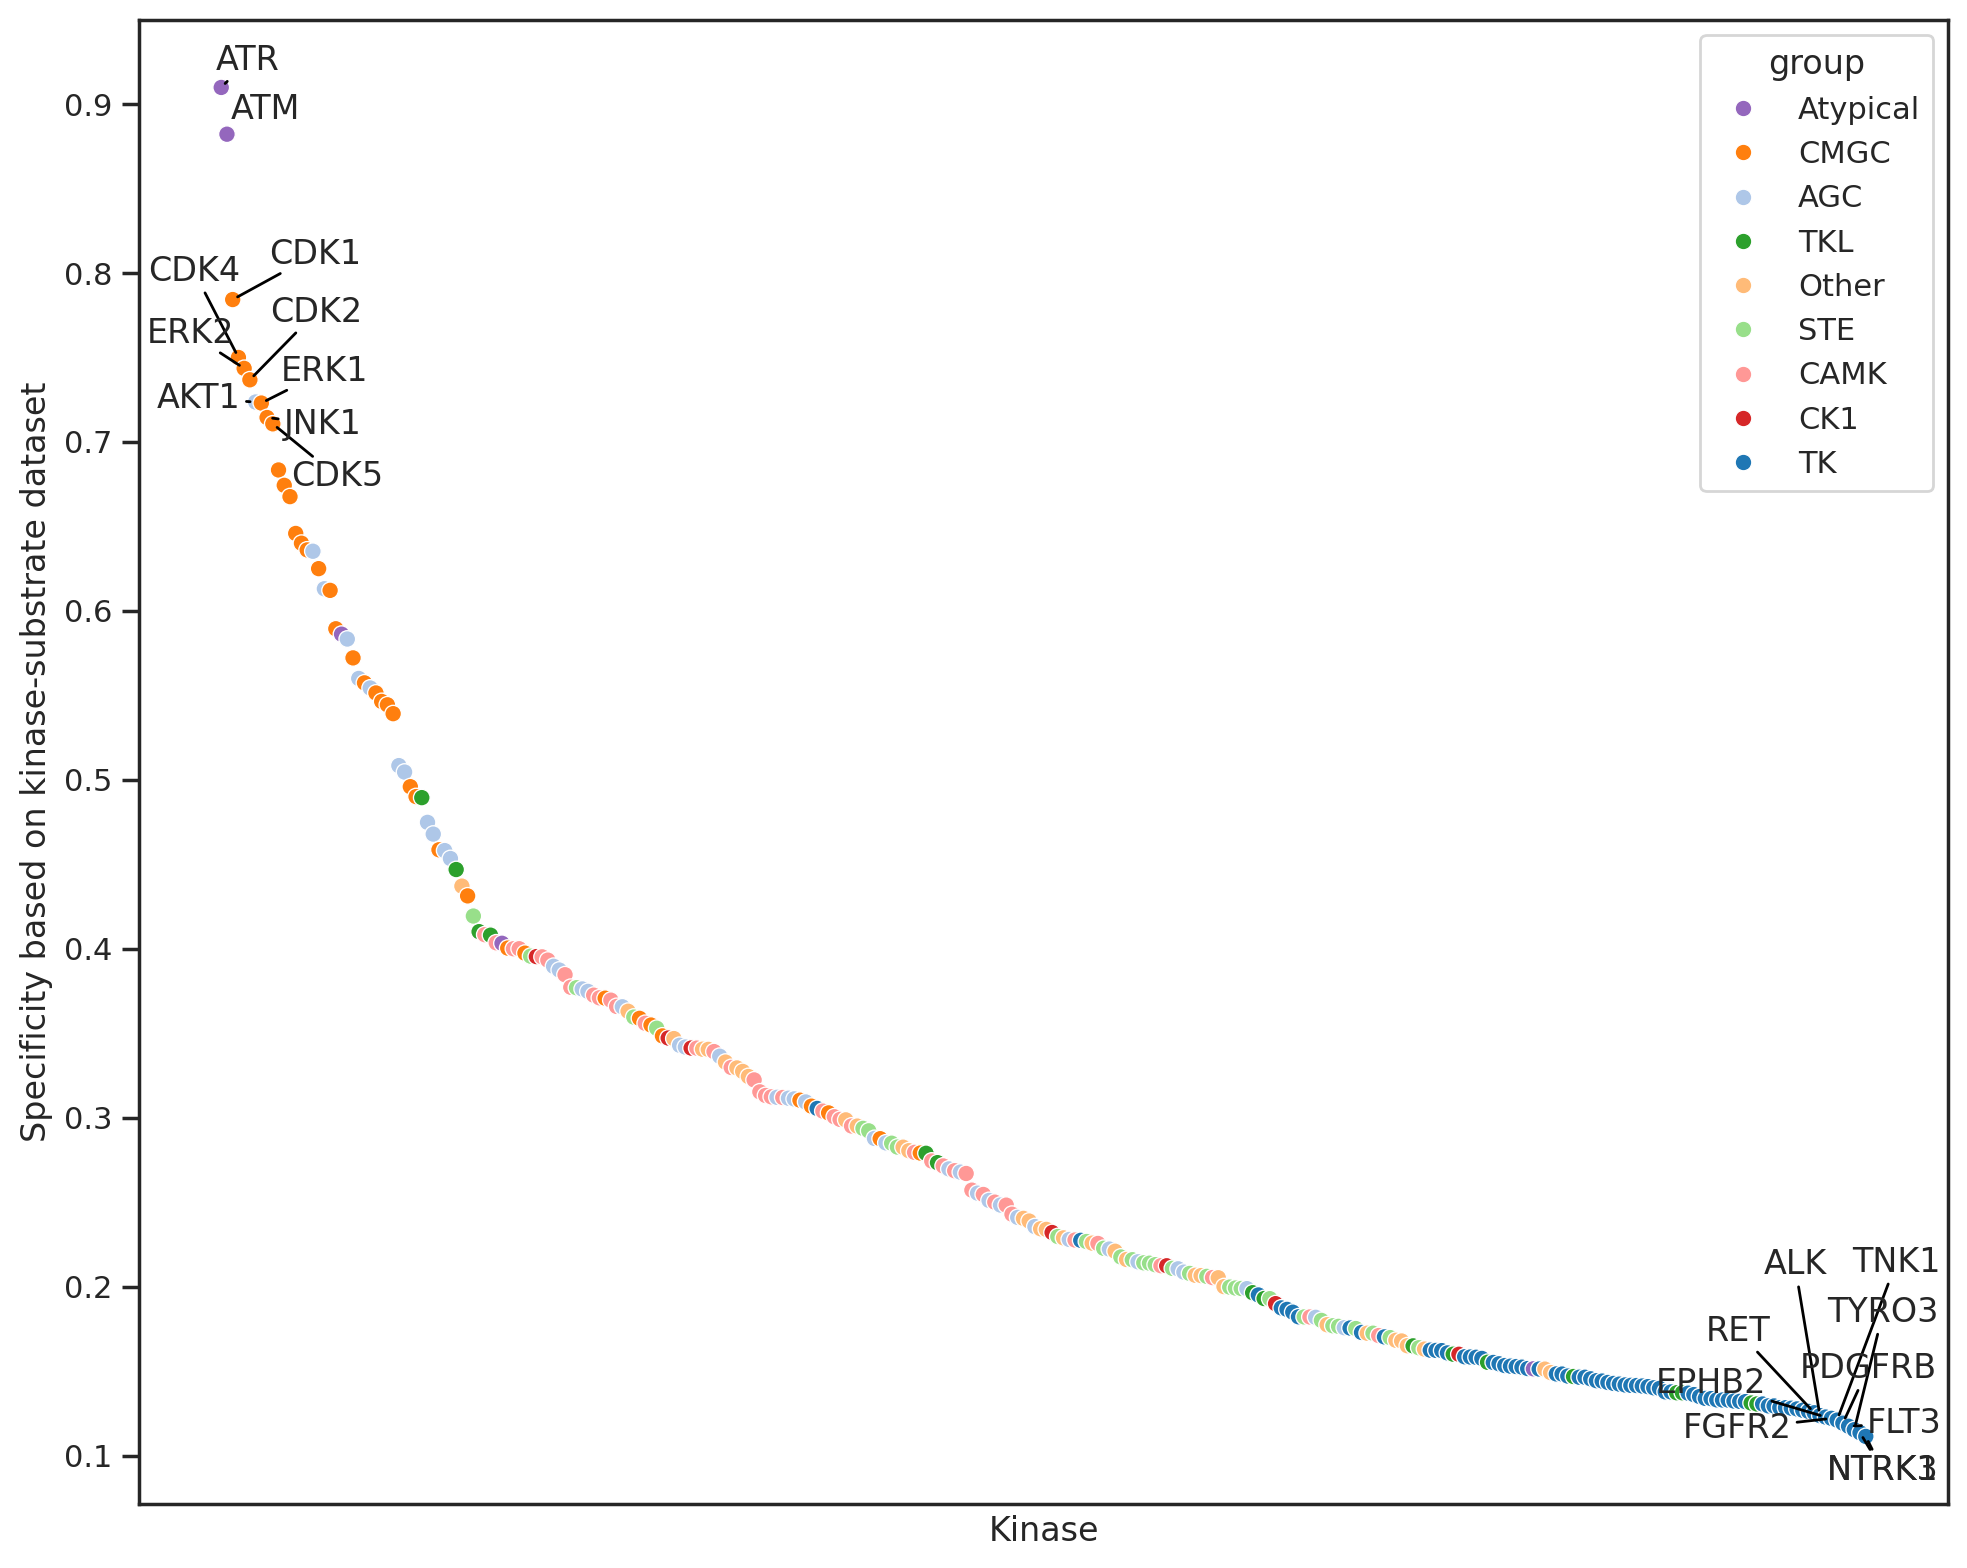

In [30]:
plot_rank(sort_ks,x='kinase',y='speci',hue='group',palette=kinase_color)
plt.ylabel('Specificity based on kinase-substrate dataset')
plt.xlabel('Kinase');

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/katlas/plot.py:406: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=group, y=value, order=idx, **kwargs)


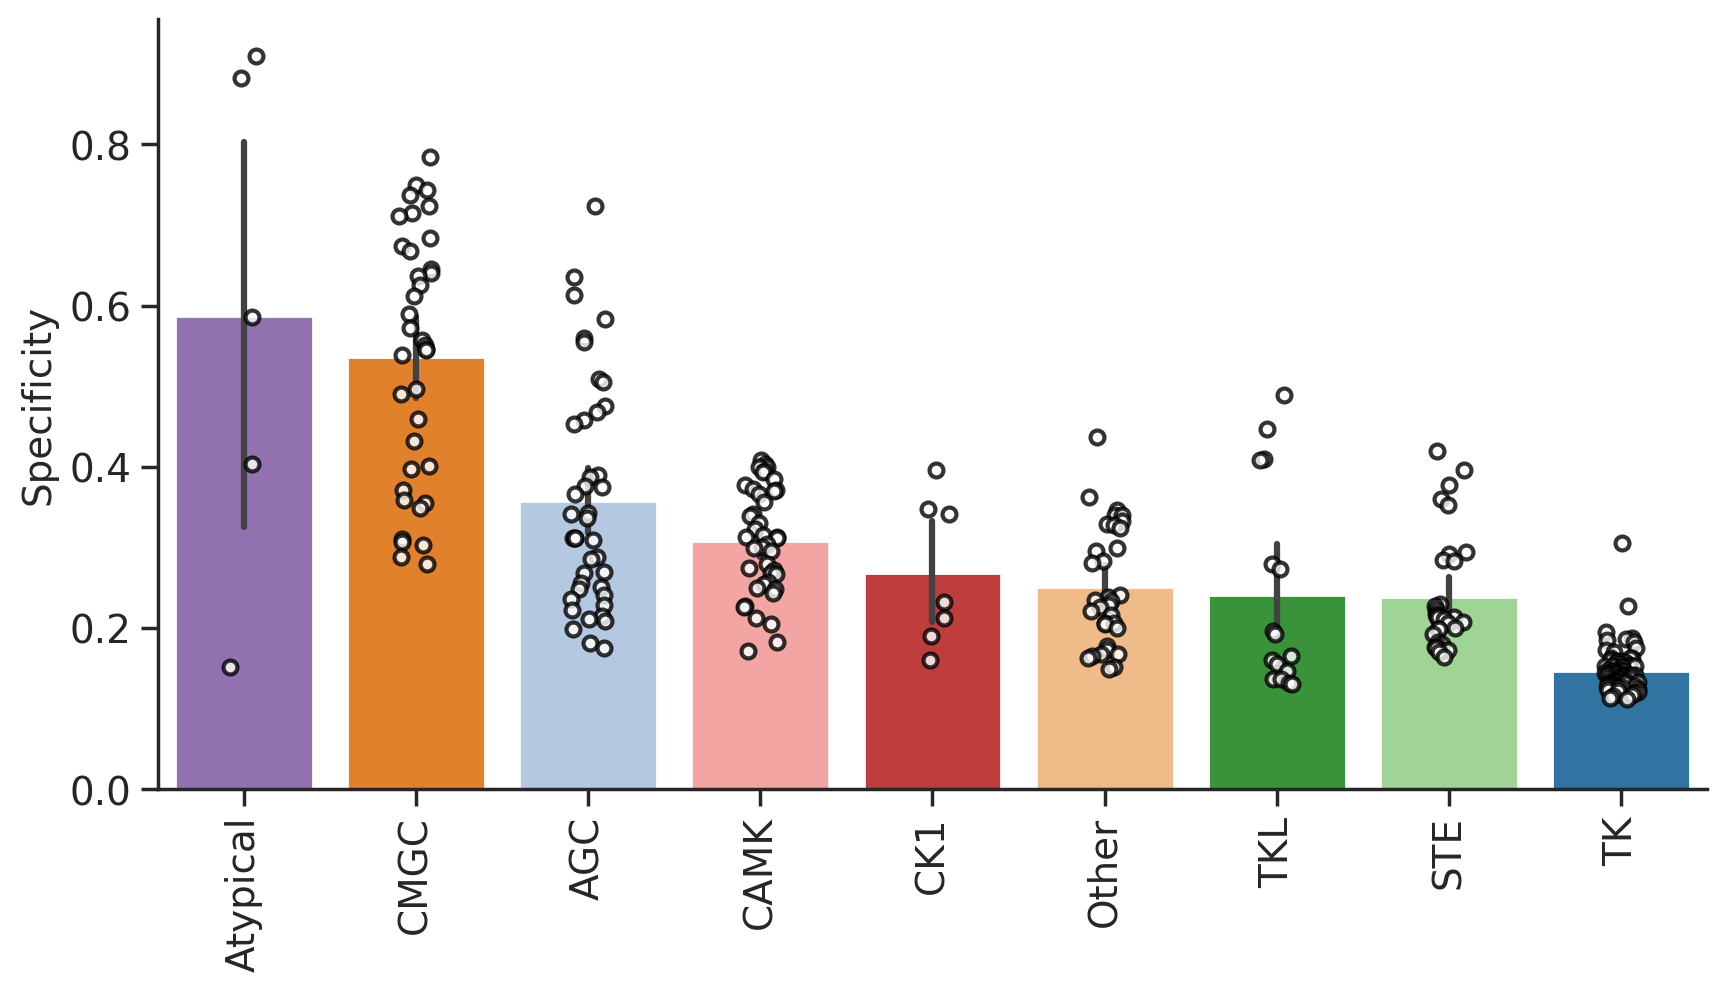

In [31]:
plot_bar(sort_ks,'speci','group',palette=kinase_color,figsize=(10,5))
plt.ylabel('Specificity');

In [32]:
overlap = sort_ks[sort_ks.kinase.isin(sort_pspa.kinase)]

overlap = overlap.rename(columns = {'speci':'ks_speci'})

overlap = overlap.merge(sort_pspa.iloc[:,:2],'left')

overlap = overlap.rename(columns = {'speci':'PSPA_speci'})

In [33]:
upper_left = overlap.query('ks_speci<0.5 & PSPA_speci>0.6')

lower_right = overlap.query('ks_speci>0.8 & PSPA_speci<0.5')

In [34]:
overlap=overlap.merge(info)

In [35]:
from adjustText import adjust_text

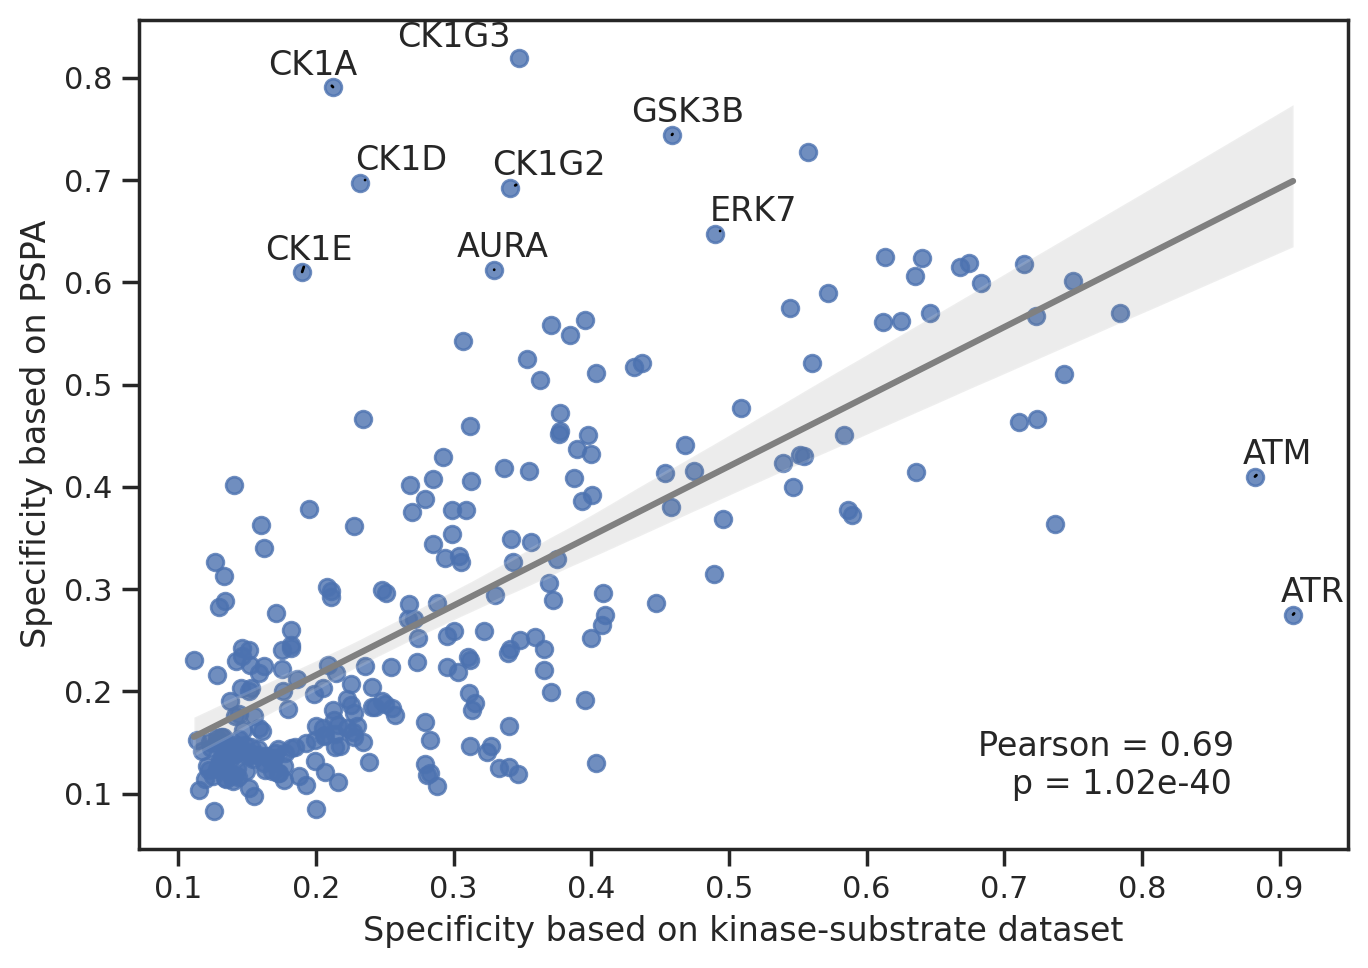

In [36]:
plt.figure(figsize=(7,5))
plot_corr(x=overlap.ks_speci, y = overlap.PSPA_speci)
plt.ylabel('Specificity based on PSPA')
plt.xlabel('Specificity based on kinase-substrate dataset')
# n = 20
texts = []
for i, row in upper_left.iterrows():
    texts.append(plt.text(row['ks_speci'], row['PSPA_speci'], row['kinase'], ha='center', va='bottom'))
    
for i, row in lower_right.iterrows():
    texts.append(plt.text(row['ks_speci'], row['PSPA_speci'], row['kinase'], ha='center', va='bottom'))
    
# Use adjustText to adjust text positions
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black'))

plt.tight_layout()